In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import analysis
import lmpsetup
import hmdsetup
import hmd

import numpy as np
import matplotlib.pyplot as plt
import analysis
import rgRPA

import scipy.constants as cnt

import mdtraj as md
import statsmodels.tsa.stattools
import MDAnalysis.analysis as mda
from matplotlib.lines import Line2D

In [524]:
lmpsetup.LMPSetup('/home/adria/test/pulchra/pr',
                 protein='PR').write_hps_files()

╔═══════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/test/pulchra/pr for PR     ║
║-------------------------------------------------------------------║
║   PARAMETERS                                                      ║
║       - Model = HPS                                               ║
║       - Chains = 1                                                ║
║       - Ionic Strength (mM) = 0.1                                 ║
║       - Medium Permittivity = 80.0                                ║
║       - Temperatures (K) = [300, 320, 340, 360, 380, 400]         ║
║       - HPS Scale = 1.0                                           ║
╚═══════════════════════════════════════════════════════════════════╝


## Summary

**[1. CPEB4 KH Testing](#1)**

**[2. CPEB4 RtoK](#2)**

**[3. HOOMD FUS Test](#3)**

**[4. Alpha helical of CPEB4](#4)**

### 1. CPEB4 KH Testing <a id='1'></a>

In [9]:
temperatures = np.linspace(300,450,8)
lmpsetup.LMPSetup(temperatures=temperatures,
                  protein='CPEB4',
                  host='@perdiu37',
                  debye=0.1,
                  oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4-H', 
                  save=50000,
                  t=int(1e9),
                  processors=2,
                  model='KH-HPS').write_hps_files()

lmpsetup.LMPSetup(temperatures=temperatures,
                  protein='CPEB4',
                  debye=0.1,
                  oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4', 
                  save=50000,
                  t=int(1e9),
                  host='@perdiu38',
                  processors=2,
                  model='KH').write_hps_files()

╔════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/KH/CPEB4-H for CPEB4     ║
║--------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                               ║
║       - Model = KH-HPS                                                                     ║
║       - Chains = 1                                                                         ║
║       - Ionic Strength (mM) = 0.1                                                          ║
║       - Medium Permittivity = 80.0                                                         ║
║       - Temperatures (K) = [300.         321.42857143 342.85714286 364.28571429 385.71428571
 407.14285714 428.57142857 450.        ]    ║
║       - HPS Scale = 1.0                                                                    ║
╚═══

In [92]:
hps_KH = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4-H')
true_KH = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4')

> Taking frames every 1 for a total of 10000 to avoid strong correlations
> Taking frames every 1 for a total of 10000 to avoid strong correlations


<ErrorbarContainer object of 3 artists>

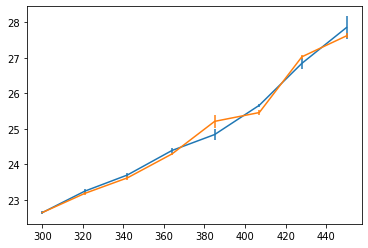

In [129]:
rg1 = hps_KH.rg()
rg_avg = []
err = []
for i,r in enumerate(rg1):
    err.append(analysis.Analysis(oliba_wd=None).block_error(observable=np.array([r]))[0])
    rg_avg.append(r.mean())

plt.errorbar(hps_KH.temperatures, rg_avg, yerr=err)

rg1 = true_KH.rg()
rg_avg = []
err = []
for i,r in enumerate(rg1):
    err.append(analysis.Analysis(oliba_wd=None).block_error(observable=np.array([r]))[0])
    rg_avg.append(r.mean())
    
plt.errorbar(true_KH.temperatures, rg_avg, yerr=err)


In [10]:
temperatures = np.linspace(300,450, 8)
lmpsetup.LMPSetup(temperatures=temperatures,
                  protein='CPEB4',
                  host='@perdiu39',
                  debye=0.1,
                  oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4_D4-H', 
                  save=50000,
                  t=int(1e9),
                  processors=2,
                  model='KH-HPS').write_hps_files()

lmpsetup.LMPSetup(temperatures=temperatures,
                  protein='CPEB4',
                  debye=0.1,
                  oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4_D4', 
                  save=50000,
                  t=int(1e9),
                  host='@perdiu40',
                  processors=2,
                  model='KH').write_hps_files()

╔═══════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/KH/CPEB4_D4-H for CPEB4     ║
║-----------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                  ║
║       - Model = KH-HPS                                                                        ║
║       - Chains = 1                                                                            ║
║       - Ionic Strength (mM) = 0.1                                                             ║
║       - Medium Permittivity = 80.0                                                            ║
║       - Temperatures (K) = [300.         321.42857143 342.85714286 364.28571429 385.71428571
 407.14285714 428.57142857 450.        ]    ║
║       - HPS Scale = 1.0                                                  

> Taking frames every 1 for a total of 10000 to avoid strong correlations
> Taking frames every 1 for a total of 10000 to avoid strong correlations


<ErrorbarContainer object of 3 artists>

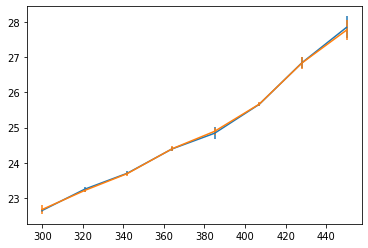

In [130]:
wt = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4-H')
d4 = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4_D4-H')

rg_wt = wt.rg()
rg_d4 = d4.rg()

rg_avg_wt = []
err_wt = []
rg_avg_d4 = []
err_d4 = []

for i,r in enumerate(rg_wt):
    err_wt.append(analysis.Analysis(oliba_wd=None).block_error(observable=np.array([r]))[0])
    rg_avg_wt.append(r.mean())
    

for i,r in enumerate(rg_d4):
    err_d4.append(analysis.Analysis(oliba_wd=None).block_error(observable=np.array([r]))[0])
    rg_avg_d4.append(r.mean())

plt.errorbar(wt.temperatures, rg_avg_wt, yerr=err_wt, label='WT')
plt.errorbar(d4.temperatures, rg_avg_d4, yerr=err_d4, label='D4')

### 2. CPEB4 RtoK <a id='2'></a>

In [145]:
temperatures = np.linspace(300,450, 6)
lmpsetup.LMPSetup(temperatures=temperatures,
                  protein='CPEB4_RtoK',
                  host='@perdiu32',
                  debye=0.1,
                  oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4_RtoK', 
                  save=50000,
                  t=int(1e9),
                  processors=2,
                  model='HPS').write_hps_files()

╔════════════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/KH/CPEB4_RtoK for CPEB4_RtoK     ║
║----------------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                       ║
║       - Model = HPS                                                                                ║
║       - Chains = 1                                                                                 ║
║       - Ionic Strength (mM) = 0.1                                                                  ║
║       - Medium Permittivity = 80.0                                                                 ║
║       - Temperatures (K) = [300. 330. 360. 390. 420. 450.]                                         ║
║       - HPS Scale = 1.0                                                

In [133]:
analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4_RtoK').rg()

> Taking frames every 1 for a total of 10000 to avoid strong correlations
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)


/home/adria/scripts/lammps/lammps/analysis.py:655: RuntimeWarning: Mean of empty slice.
  errors = []
/home/adria/scripts/lammps/lammps/analysis.py:662: RuntimeWarning: Mean of empty slice.
  errors.append(np.sqrt(err / (n_blocks * (n_blocks - 1))))
/home/adria/scripts/lammps/lammps/analysis.py:404: RuntimeWarning: Mean of empty slice.
  return np.array(rgs), np.array(err)


(array([nan, nan, nan, nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan]))

Choose which aminoacids are going to be used for KH

In [16]:
t = analysis.Analysis(oliba_wd=None)

In [18]:
r, aa_dict = t.pair_potential()

Attempt to change lambda value to 1 just for testing...

In [146]:
temperatures = np.linspace(300,450,6)
test = lmpsetup.LMPSetup(temperatures=temperatures,
                  protein='CPEB4',
                  host='@perdiu33',
                  debye=0.1,
                  oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4_RasP', 
                  save=50000,
                  t=int(1e9),
                  processors=2,
                  model='HPS')
test.residue_dict["R"]["lambda"] = 1
test.write_hps_files()

╔═══════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/KH/CPEB4_RasP for CPEB4     ║
║-----------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                  ║
║       - Model = HPS                                                                           ║
║       - Chains = 1                                                                            ║
║       - Ionic Strength (mM) = 0.1                                                             ║
║       - Medium Permittivity = 80.0                                                            ║
║       - Temperatures (K) = [300. 330. 360. 390. 420. 450.]                                    ║
║       - HPS Scale = 1.0                                                                       ║
╚═══════════════════

### 3. HOOMD FUS Test <a id='3'></a>

In [2]:
# temperatures_FUS = np.array(plot_data)[:,1]*344.4
temperatures_FUS = [290, 300, 310, 320]

for temp in temperatures_FUS:
    hmdsetup.HMDSetup(oliba_wd=f'/home/adria/irb/hoomd/FUS2',
                          protein='FUS',
                          chains=100, 
                          model='HPS',
                          save=50000,
                          t=int(1e9),
                          slab=True,
                          use_random=True,
                          temperature=temp,
                          debye=0.1).write_hps_files()

## HMD RESULTS

[<mdtraj.Trajectory with 363 frames, 16300 atoms, 16300 residues, and unitcells at 0x7fd02291b9d0>, <mdtraj.Trajectory with 190 frames, 16300 atoms, 16300 residues, and unitcells at 0x7fd02291b850>, <mdtraj.Trajectory with 409 frames, 16300 atoms, 16300 residues, and unitcells at 0x7fd021fa5fd0>, <mdtraj.Trajectory with 431 frames, 16300 atoms, 16300 residues, and unitcells at 0x7fd021fa5650>]
85.50464876033058


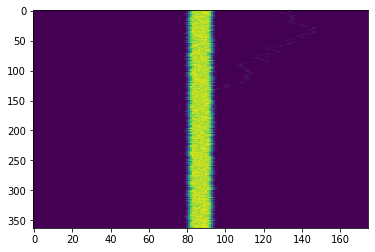

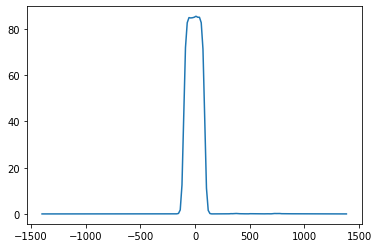

In [3]:
s = hmd.HMD(md_dir='/home/adria/irb/hoomd/FUS2', equil_frames=100)
T=0
z, rho = s.density_profile(T=T)
print(rho.mean(axis=0).max())
plt.imshow(rho, aspect='auto')
plt.figure()
plt.plot(z,rho.mean(axis=0))


#     intf = s.interface_position(z=z, rho_z=rho.mean(axis=0))[0]
#     print(intf)
#     plt.plot(z[68:90],rho.mean(axis=0)[68:90], '--', label=f'{T}-HMD')
#     plt.axvline(intf[0])
#     plt.axvline(intf[1])
#     z, rho = fus.density_profile(T=T)
#     intf = fus.interface_position(z=z, rho_z=rho.mean(axis=0))
#     plt.plot(z[68:90],rho.mean(axis=0)[68:90],  label=f'{T}-LMP')
#     plt.axvline(intf[0], color='orange')
#     plt.axvline(intf[1], color='orange')
    
# plt.legend()

# rho_d, rho_c = s.phase_diagram()
# exp_data = np.genfromtxt('/home/adria/documents/fus.txt', delimiter=',')
# print(exp_data)
# plt.plot(rho_c, s.temperatures, '--o')
# plt.plot(rho_d, s.temperatures, '--o')

In [ ]:
s = hmd.HMD(md_dir='/home/adria/irb/hoomd/FUS2', equil_frames=100)

rho_d, rho_c = s.phase_diagram()
exp_data = np.genfromtxt('/home/adria/documents/fus.txt', delimiter=',')
# print(exp_data)
plt.plot(rho_c, s.temperatures, '--o')
plt.plot(rho_d, s.temperatures, '--o')

## LMP RESULTS

> Taking frames every 1 for a total of 10000 to avoid strong correlations
126.11062834224599


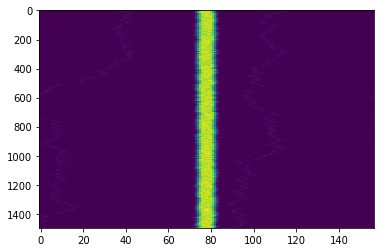

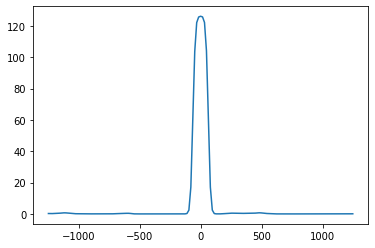

In [185]:
t = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/FUS_TEST')
T=0
z, rho = t.density_profile(T=T)
print(rho.mean(axis=0).max())
plt.imshow(rho, aspect='auto')
plt.figure()
plt.plot(z,rho.mean(axis=0))

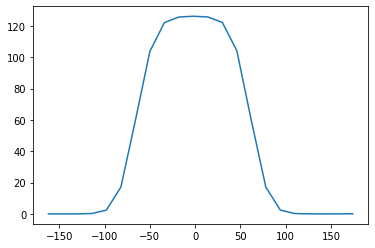

In [164]:
plt.plot(z[68:90],rho.mean(axis=0)[68:90],  label=f'{T}-LMP')

> Taking frames every 1 for a total of 10000 to avoid strong correlations


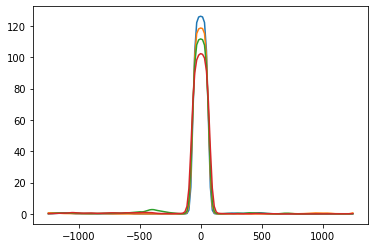

In [150]:
fus = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/FUS_TEST')
for T in range(4):
    z, rho = fus.density_profile(T=T)
    plt.plot(z,rho.mean(axis=0))

Compared to LMP FUS:

> Taking frames every 1 for a total of 10000 to avoid strong correlations
> Interface fit failed for negative z, returning 0 (no interface) !!!


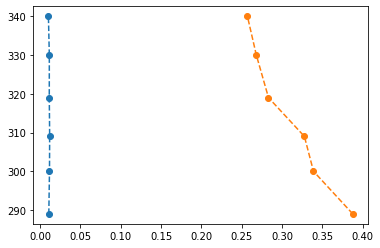

In [31]:
fus = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/FUS_TEST')
rho_c, rho_d = fus.phase_diagram()

exp_data = np.genfromtxt('/home/adria/documents/fus.txt', delimiter=',')
# plt.plot(rho_c*1660.54, fus.temperatures, '--o')
plt.plot(rho_c, fus.temperatures, '--o')
# plt.plot(rho_d*1660.54, fus.temperatures, '--o')
plt.plot(rho_d, fus.temperatures, '--o')
# plt.plot(exp_data[:,0],  exp_data[:,1]*344.4, '--o')

### 4. Secondary structure on CPEB4 <a id='4'></a>

Start from a non helical CPEB4 and then add the helicity !

In [59]:
seq = 'MGDYGFGVLVQSNTGNKSAFPVRFHPHLQPPHHHQNATPSPAAFINNNTAANGSSAGSAWLFPAPATHNIQDEILGSEKAKSQQQEQQDPLEKQQLSPSPGQEAGILPETEKAKSEENQGDNSSENGNGKEKIRIESPVLTGFDYQEATGLGTSTQPLTSSASSLTGFSNWSAAIAPSSSTIINEDASFFHQGGVPAASANNGALLFQNFPHHVSPGFGGSFSPQIGPLSQHHPHHPHFQHHHSQHQQQRRSPASPHPPPFTHRNAAFNQLPHLANNLNKPPSPWSSYQSPSPTPSSSWSPGGGGYGGWGGSQGRDHRRGLNGGITPLNSISPLKKNFASNHIQLQKYARPSSAFAPKSWMEDSLNRADNIFPFPDRPRTFDMHSLESSLIDIMRAENDTIKARTYGRRRGQSSLFPMEDGFLDDGRGDQPLHSGLGSPHCFSHQNGE'

In [63]:
nexp = seq[378:393]
nexp

'RTFDMHSLESSLIDI'

In [53]:
lmpsetup.LMPSetup(oliba_wd='/home/adria/test/CPEB4_alpha',
                  protein='CPEB4',
                  time=(1e7),
                  save=50000, 
                  temperatures=[300],
                  debye=0.1).write_hps_files(qsub=False)

╔═══════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/test/CPEB4_alpha for CPEB4     ║
║-----------------------------------------------------------------------║
║   PARAMETERS                                                          ║
║       - Model = HPS                                                   ║
║       - Chains = 1                                                    ║
║       - Ionic Strength (mM) = 0.1                                     ║
║       - Medium Permittivity = 80.0                                    ║
║       - Temperatures (K) = [300]                                      ║
║       - HPS Scale = 1.0                                               ║
╚═══════════════════════════════════════════════════════════════════════╝


In [121]:
coords = np.zeros(shape=(448,3))
d = np.arange(0, 378*3.8, 3.8)
coords[:d.shape[0],0] = d


In [122]:
alpha_coords = md.load_pdb('/home/adria/test/CPEB4_alpha/ca_nexp.pdb').xyz*10.
alpha_coords=alpha_coords+[+1463.5980011+3.8,-81.949,-22.581999]

In [123]:
coords[378:393,:] = alpha_coords

In [124]:
alpha_coords

array([[[ 1.43640000e+03, -2.50244140e-06, -1.74926758e-07],
        [ 1.43767800e+03, -3.46899664e+00, -8.92000373e-01],
        [ 1.43746900e+03, -4.70700323e+00,  2.70500166e+00],
        [ 1.43419000e+03, -2.91399634e+00,  3.42100126e+00],
        [ 1.43200300e+03, -5.69999945e+00,  4.79599935e+00],
        [ 1.42884700e+03, -3.60399878e+00,  5.19000036e+00],
        [ 1.42722600e+03, -5.74199927e+00,  2.49500066e+00],
        [ 1.42763100e+03, -8.74599707e+00,  4.80500013e+00],
        [ 1.42618200e+03, -6.78800452e+00,  7.73300153e+00],
        [ 1.42305200e+03, -5.68200171e+00,  5.87400037e+00],
        [ 1.42238500e+03, -9.21000159e+00,  4.64200002e+00],
        [ 1.42282101e+03, -1.05560023e+01,  8.16200048e+00],
        [ 1.42060200e+03, -7.94199622e+00,  9.81900198e+00],
        [ 1.41797900e+03, -8.68699896e+00,  7.15900213e+00],
        [ 1.41762200e+03, -1.21610056e+01,  8.69199926e+00]]])

In [126]:
final = np.arange( 8.69199926e+00+3.8,  8.69199926e+00+3.8+55*3.8, +3.8)
coords[393:,0] = 1.41762200e+03
coords[393:,1] = -1.21610056e+01
coords[393:,2] = final

In [127]:
coords[:,0]

array([   0.        ,    3.8       ,    7.6       ,   11.4       ,
         15.2       ,   19.        ,   22.8       ,   26.6       ,
         30.4       ,   34.2       ,   38.        ,   41.8       ,
         45.6       ,   49.4       ,   53.2       ,   57.        ,
         60.8       ,   64.6       ,   68.4       ,   72.2       ,
         76.        ,   79.8       ,   83.6       ,   87.4       ,
         91.2       ,   95.        ,   98.8       ,  102.6       ,
        106.4       ,  110.2       ,  114.        ,  117.8       ,
        121.6       ,  125.4       ,  129.2       ,  133.        ,
        136.8       ,  140.6       ,  144.4       ,  148.2       ,
        152.        ,  155.8       ,  159.6       ,  163.4       ,
        167.2       ,  171.        ,  174.8       ,  178.6       ,
        182.4       ,  186.2       ,  190.        ,  193.8       ,
        197.6       ,  201.4       ,  205.2       ,  209.        ,
        212.8       ,  216.6       ,  220.4       ,  224.2    

In [128]:
s = md.load_pdb('/home/adria/test/CPEB4_alpha/topo.pdb')
s.xyz = coords/10.
s.save_pdb('/home/adria/test/CPEB4_alpha/topo_test.pdb')

We made some equilibration and so we save the results :

In [6]:
t = md.load('/home/adria/test/CPEB4_alpha/atom_traj_0.lammpstrj', top='/home/adria/test/CPEB4_alpha/topo.pdb')

In [7]:
t[-1].save_pdb('/home/adria/CPEB4_alpha.pdb')

Let's test it !

In [43]:
temperatures = np.linspace(300,450,6)
test_alpha = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/CPEB4_alpha_slab',
                               debye=0.1,
                               temperatures=temperatures,
                               model='HPS',
                               save=50000,
                               host='@perdiu31',
                               chains=1,
                               protein='CPEB4_alpha',
                               fix_region=[379,393],
                               t=int(1e9)).write_hps_files(qsub=True)

╔════════════════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/CPEB4_alpha_slab for CPEB4_alpha     ║
║--------------------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                           ║
║       - Model = HPS                                                                                    ║
║       - Chains = 1                                                                                     ║
║       - Ionic Strength (mM) = 0.1                                                                      ║
║       - Medium Permittivity = 80.0                                                                     ║
║       - Temperatures (K) = [300. 330. 360. 390. 420. 450.]                                             ║
║       - HPS Scale = 1.0            